<a href="https://colab.research.google.com/github/sarahroyle/SDA-Group-Work/blob/main/Bayesian_Statistics_Exam_Sarah_Royle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import scipy as scp
import scipy.stats as stats
import statistics as Stats
import statsmodels.api as sm
from scipy.stats import norm, binom, poisson, sem
from scipy.signal import argrelextrema, argrelmax

10000


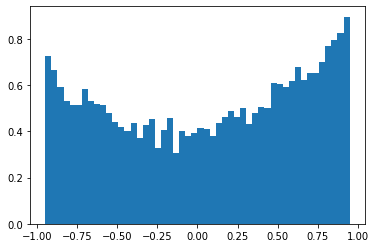

In [2]:
#This was created with a collab notebook and data file was uploaded to session storage
xData = np.loadtxt('AFB.out')
NC, NB = 10**6, 10**5
nBin = 100
NE = len(xData)
print(NE)
y, x, dum = plt.hist(xData, nBin//2, density= True)

# Question 2

In [3]:
a = 0.95
def PDF(AFB, B, x):   # pdf
  return (1 + (8*AFB*x)/3 + (B*x**2)) * (1 /(2*a*(1 + (B*a**2/3))))   #This is the model, f(x)

In [4]:
def logposterior(AFB, B): # Log of the posterior
  if B >= 0 and AFB >= -3/8 and AFB <= 3/8:   # Impose limits on the prior 
    return np.sum(np.log(PDF(AFB, B, xData)))    
  else:
    return -np.inf

# Question 3

In [5]:
sAFB, sB = 1./np.sqrt(NE), 1./np.sqrt(NE)
def Proposal (AFB, B):
    p1= np.random.normal(AFB,sAFB)
    p2= np.random.normal(B,sB)
    return p1, p2

In [6]:
#Sampling with MCMC Metropolis Hastings
chain =np.empty((NC, 3))  #Initialise the chain
d1_0, d2_0 =0.3, 0.2
chain[0] = d1_0, d2_0, logposterior(d1_0, d2_0)

for i in range(NC-1):   # Fill the chain with MH
    xstar1, xstar2 = Proposal(chain[i,0], chain[i,1])
    logPostStar = logposterior(xstar1, xstar2)
    logRatio = logPostStar - chain[i,2]
    if logRatio >= 1:             #Acceptance check
        chain[i+1] = xstar1, xstar2, logPostStar
    elif logRatio > np.log(np.random.random()):
        chain[i+1] = xstar1, xstar2, logPostStar
    else:
        chain[i+1]= chain[i]

chain = chain[NB:]  #Burn-in

In [7]:
chain2 = chain.copy()
chain2 = chain2[10**4:]

# Question 4

Mean of AFB: 0.1021301186824269
Mean of Beta: 1.052009929815727
Std of AFB: 0.009844686312823137
Std of Beta: 0.0653810725868482
0.206816679969097


Text(0, 0.5, 'β')

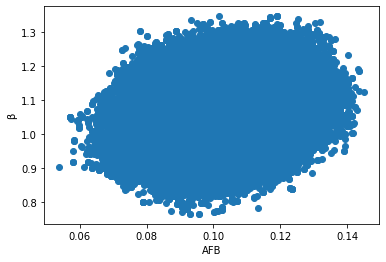

In [8]:
d1, d2 = chain[:,0], chain[:,1]
AFB_mean = d1.mean()
AFB_dev = d1.std(ddof = 1)
Beta_mean = d2.mean()
Beta_dev = d2.std(ddof = 1)


plt.scatter(d1, d2)
print("Mean of AFB:", d1.mean())
print("Mean of Beta:", d2.mean())
print("Std of AFB:",d1.std(ddof = 1))
print("Std of Beta:", d2.std(ddof = 1))
print(np.corrcoef(d1, d2)[0,1])
plt.xlabel('AFB')
plt.ylabel('β')

Text(0.5, 1.0, 'Histogram of AFB')

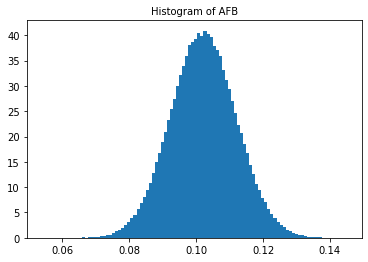

In [9]:
plt.hist(d1, nBin, density=True)
plt.title("Histogram of AFB", fontsize = 10)

Text(0.5, 1.0, 'Histogram of Beta')

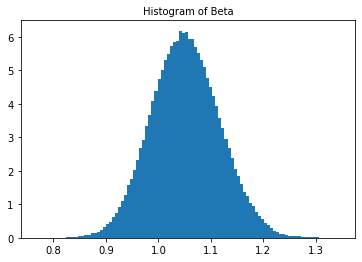

In [10]:
plt.hist(d2, nBin, density=True)
plt.title("Histogram of Beta", fontsize = 10)

In [11]:
# Normality check for AFB 1D histogram
stats.kstest(d1, 'norm', args = (AFB_mean, AFB_dev))

KstestResult(statistic=0.0017294700147655329, pvalue=0.009168993056574237)

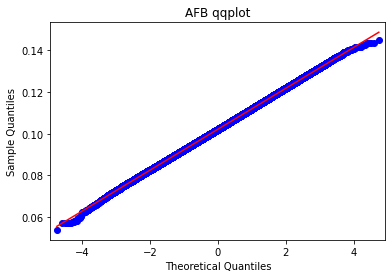

In [12]:
sm.qqplot(d1, line = 'q')
plt.title('AFB qqplot')
plt.show()

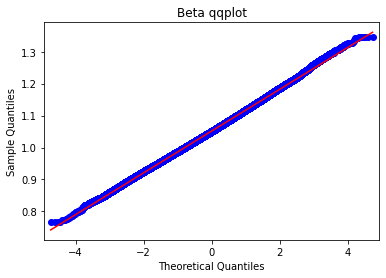

In [13]:
sm.qqplot(d2, line='q')
plt.title("Beta qqplot")
plt.show()

# Question 5

Median: 0.10210552956023629
CI: 0.09233541136586562 - 0.11193063421170692


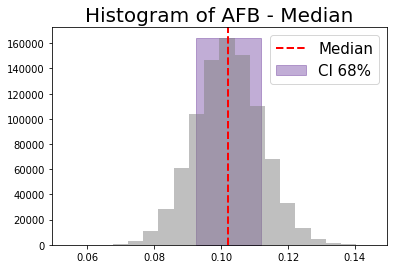

In [26]:
#CI of AFB 
# median of the 50th percentile

d1_median = np.percentile(d1, 50)
d1_CI_1 = np.percentile(d1, 16)
d1_CI_2 = np.percentile(d1, 84)

height, bins, patches = plt.hist(d1, color='grey', bins=20, alpha=0.5)
plt.fill_betweenx([0, height.max()], d1_CI_1, d1_CI_2, color='rebeccapurple', alpha=0.4, label="CI 68%")
plt.title("Histogram of AFB - Median", fontsize=20)
plt.axvline(d1_median, color='r', linestyle='dashed', linewidth=2, label="Median")
plt.legend(fontsize=15)
print("Median:", d1_median)
print("CI:", d1_CI_1, "-", d1_CI_2)

Median: 1.0508185779299728
CI: 0.987339811740594 - 1.1170879701694523


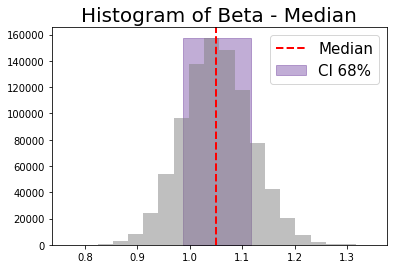

In [27]:
d2_median = np.percentile(d2, 50)
d2_CI_1 = np.percentile(d2, 16)
d2_CI_2 = np.percentile(d2, 84)

height, bins, patches = plt.hist(d2, color='grey', bins=20, alpha=0.5)
plt.fill_betweenx([0, height.max()], d2_CI_1, d2_CI_2, color='rebeccapurple', alpha=0.4, label="CI 68%")
plt.title("Histogram of Beta - Median", fontsize=20)
plt.axvline(d2_median, color='r', linestyle='dashed', linewidth=2, label="Median")
plt.legend(fontsize=15)
print("Median:", d2_median)
print("CI:", d2_CI_1, "-", d2_CI_2)

Mode AFB: 0.10233428293516632
Mode d1 percentile: 50.92766666666667
CI 68% 0.09271170076144077 0.11232508179600723
Mode of AFB 0.10233428293516632
CI AFB: 0.09271170076144077 - 0.11232508179600723


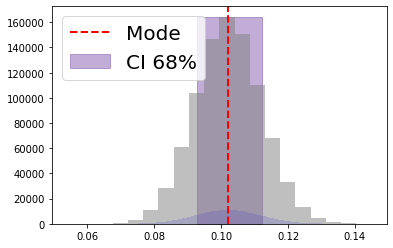

In [28]:
#CI of AFB
#For continous variable and values mean can be calculated from the bins with maximum number of data
x, bins, patches = plt.hist(d1, color='b', bins=300, alpha=0.2)
mode_index =x.argmax()
d1_mode = (bins[mode_index] + bins[mode_index+1])/2

#percentile of the mode
d1_percentile_mode = stats.percentileofscore(d1, d1_mode)
print("Mode AFB:", d1_mode)
print("Mode d1 percentile:", d1_percentile_mode)

d1_mode_CI_1 = np.percentile(d1, d1_percentile_mode - 34)
d1_mode_CI_2 = np.percentile(d1, d1_percentile_mode + 34)
print("CI 68%", d1_mode_CI_1, d1_mode_CI_2)

height, bins, patches =plt.hist(d1, color='grey', bins=20, alpha=0.5)
plt.fill_betweenx([0, height.max()],d1_mode_CI_1, d1_mode_CI_2, color='rebeccapurple', alpha=0.4, label="CI 68%")
plt.axvline(d1_median, color='r', linestyle='dashed', linewidth=2, label="Mode")
plt.legend(fontsize=20)
print("Mode of AFB", d1_mode)
print("CI AFB:", d1_mode_CI_1,"-", d1_mode_CI_2)